In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [7]:
# Load
base = pd.read_csv('../../data/credit_card_clients.csv', header=1)
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
base['BILL_TOTAL'] = 0
for i in range(1, 7):
    base['BILL_TOTAL'] += base['BILL_AMT' + str(i)]
    
X = base.iloc[:, [1,25]].values

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0.5, 1.0, 'Silhouette Scores')

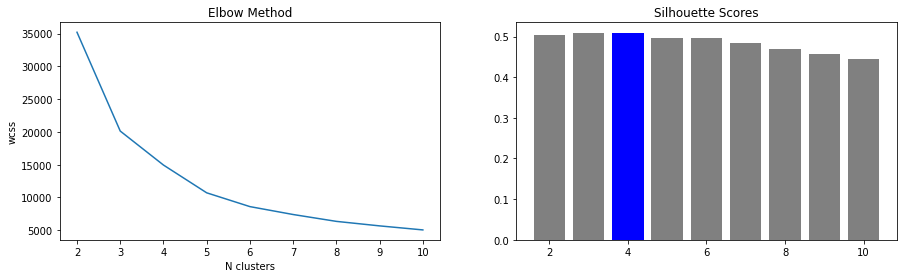

In [43]:
wcss = []
silhouette_scores = []
n_cluster = 10

for i in range(2, n_cluster + 1):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, KMeans(i, random_state=0).fit_predict(X)))


# Plotting data
fig = plt.figure(figsize=(15, 4))
clrs = ['grey' if (x < max(silhouette_scores)) else 'blue' for x in silhouette_scores ]

plt.subplot(121)
plt.plot(range(2, 11), wcss)
plt.xlabel('N clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')

plt.subplot(122)
plt.bar(range(2, 11), silhouette_scores, color=clrs)
plt.title('Silhouette Scores')

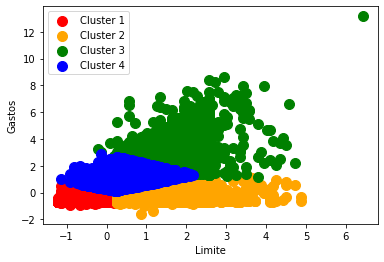

In [35]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)

plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()